In [1]:
import tensorflow as tf

print(tf.__version__)

2.4.1


In [2]:
# 폴더구조 생성 및 고양이, 멍멍이 이미지 각 폴더로 복사

import os, shutil

original_dataset_dir = './data/cat_dog/train'

base_dir = 'data/cat_dog_full'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)


train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

## file 복사 ##
## 고양이와 멍멍이가 각각 12,500개
## train : 7,000 
## validation : 3,000
## test : 2,500 

fnames = ['cat.{}.jpg'.format(i) for i in range(7000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(7000,10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(10000,12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(7000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(7000,10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(10000,12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src,dst)

Found 14000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)


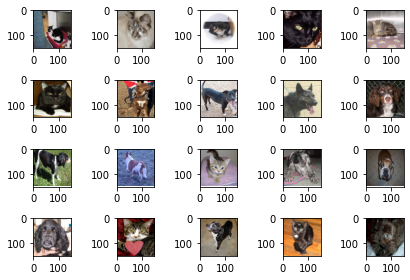

In [4]:
# keras가 제공하는 ImageDataGenerator
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = './data/cat_dog_full/train'
valid_dir = './data/cat_dog_full/validation'

# ImageDataGenerator 생성
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,               # target directory
    classes=['cats','dogs'], # [0, 1]
    target_size=(150,150),   # image resize
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    valid_dir,               # target directory
    classes=['cats','dogs'], # [0, 1]
    target_size=(150,150),   # image resize
    batch_size=20,
    class_mode='binary'
)

for x_data, t_data in train_generator:
    print(x_data.shape) # (20, 150, 150, 3)
    print(t_data.shape) # (20,)
    break
    
figure = plt.figure()
ax = []

for i in range(20):
    ax.append(figure.add_subplot(4,5,i+1)) # 4행 5열

for x_data, t_data in train_generator:
    print(x_data.shape) # (20, 150, 150, 3)
    print(t_data.shape) # (20,)
    
    for idx, img_data in enumerate(x_data): # enumerate : 첫번째 인자를 인덱스로, 나머지는 데이터로
        ax[idx].imshow(img_data)
    break
    
plt.tight_layout()
plt.show()

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam # or RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=(150,150,3))) # color!

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu'))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# model.add(Dropout(rate=0.5))

model.add(Dense(units=256, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0

2022-04-19 15:20:45.445655: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-19 15:20:45.445880: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-19 15:20:45.446027: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(train_generator, # 이미지 14000개 / 20개씩 batch = 700번
                   steps_per_epoch=700,
                   epochs=30,
                   validation_data=validation_generator, # 이미지 6000개 / 20개씩 batch = 300번
                   validation_steps=300)

model.save('./data/cats_dogs_full_cnn_model.h5')

Epoch 1/30
700/700 [==============================] - 1217s 2s/step - loss: 0.6177 - accuracy: 0.6487 - val_loss: 0.5218 - val_accuracy: 0.7377
Epoch 2/30
700/700 [==============================] - 1208s 2s/step - loss: 0.4694 - accuracy: 0.7800 - val_loss: 0.4495 - val_accuracy: 0.7960
Epoch 3/30
700/700 [==============================] - 1212s 2s/step - loss: 0.4172 - accuracy: 0.8088 - val_loss: 0.4460 - val_accuracy: 0.7995
Epoch 4/30
700/700 [==============================] - 1208s 2s/step - loss: 0.3796 - accuracy: 0.8339 - val_loss: 0.4255 - val_accuracy: 0.8060
Epoch 5/30
449/700 [==================>...........] - ETA: 6:21 - loss: 0.3359 - accuracy: 0.8490